# Import library

In [2]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

# Read data and show

In [3]:
cancer_data = datasets.load_breast_cancer()
# show to test record 5th
print(cancer_data.data[5])
print(cancer_data.data.shape)
#target set
print(cancer_data.target)

[1.245e+01 1.570e+01 8.257e+01 4.771e+02 1.278e-01 1.700e-01 1.578e-01
 8.089e-02 2.087e-01 7.613e-02 3.345e-01 8.902e-01 2.217e+00 2.719e+01
 7.510e-03 3.345e-02 3.672e-02 1.137e-02 2.165e-02 5.082e-03 1.547e+01
 2.375e+01 1.034e+02 7.416e+02 1.791e-01 5.249e-01 5.355e-01 1.741e-01
 3.985e-01 1.244e-01]
(569, 30)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 

# Split to train and test

In [4]:
cancer_data = datasets.load_breast_cancer()
cancer_data_data = np.concatenate((np.ones(( cancer_data.data.shape[0], 1)), cancer_data.data), axis = 1)
X_train, X_test, y_train, y_test = train_test_split(cancer_data_data, cancer_data.target, test_size=0.3,random_state=109)

# Build function

In [5]:
# Define h_w(x):= W^T.x + w_0 = \bar{W}^T . \bar{x}
def h(w, x):
    return np.sign(np.dot(w.T, x))

#Stop condition
def has_converged(X, y, w):
    return np.array_equal(h(w, X), y) #True if h(w, X) == y else False

# Perceptron function

In [6]:
def perceptron(X, y, w_init):
    w = [w_init]
    N = X.shape[1]
    mis_points = [] # set of miss position points
    while True:
        # mix data
        mix_id = np.random.permutation(N)
        for i in range(N):
            xi = X[:, mix_id[i]].reshape(31, 1)
            yi = y[0, mix_id[i]]
            if h(w[-1], xi)[0] != yi:
                mis_points.append(mix_id[i])
                w_new = w[-1] + yi*xi
                w.append(w_new)
        if has_converged(X, y, w[-1]):
            break
    return (w, mis_points)

# Print w

In [7]:
# d = X_train.T.shape[0]
# w_init = np.random.randn(d, 1)
# print(X_train.T.shape)
# print(np.array([y_train]).shape)
# (w, m) = perceptron(X_train.T, np.array([y_train]), w_init)     # waste too much time and not show result
# print(w[-1].T)

# Use perceptron sklearn

In [8]:
per = Perceptron(penalty=None)
per.fit(X_train, y_train)
y_pre = per.predict(X_test)


# predict test and show score

In [9]:
print("Accuracy score:", accuracy_score(y_test, y_pre))
print("Precision score:", precision_score(y_test, y_pre))
print("Recall score:", recall_score(y_test, y_pre))

Accuracy score: 0.8362573099415205
Precision score: 1.0
Recall score: 0.7407407407407407


# Reduce dimension

In [10]:

cancer_data_data = StandardScaler().fit_transform(cancer_data.data)
pca = PCA(n_components= 2)
result = pca.fit_transform(cancer_data_data)

# Plot 2D

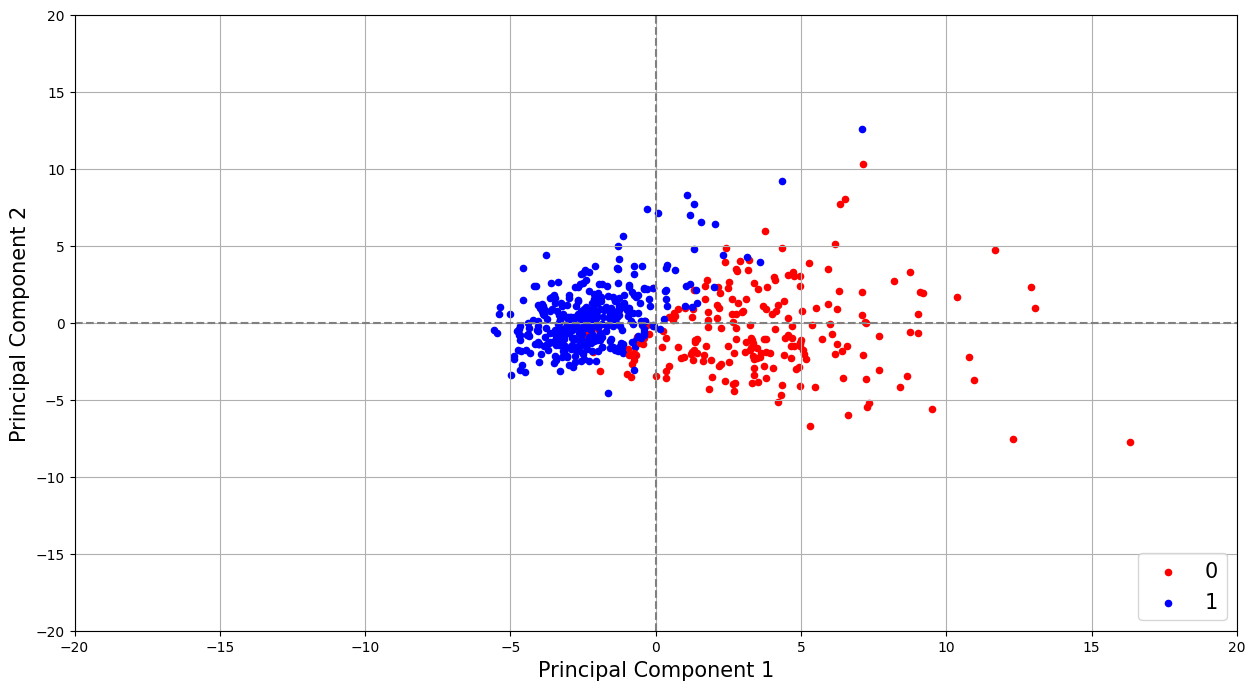

In [11]:
def plot_scatter(pc1, pc2):
    fig, ax = plt.subplots(figsize=(15, 8))
    cancer = list(set(cancer_data.target))
    cancer_color = ["r","b","g"]
    for i, spec in enumerate(cancer_data.target):
        plt.scatter(pc1[i], pc2[i], label = spec, s = 20,
        c=cancer_color[cancer.index(spec)])
        # ax.annotate(str(i+1), (pc1[i],pc2[i]))

    from collections import OrderedDict
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = OrderedDict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys(), prop={'size': 15}, loc=4)
    ax.set_xlabel('Principal Component 1', fontsize = 15)
    ax.set_ylabel('Principal Component 2', fontsize = 15)
    ax.axhline(y=0, color="grey", linestyle="--")
    ax.axvline(x=0, color="grey", linestyle="--")
    plt.grid()
    plt.axis([-20, 20, -20, 20])
    plt.show()
plot_scatter(result[:,0], result[:,1])

# Logistic regression

In [12]:
logr = LogisticRegression(penalty="none")
logr.fit(X_train, y_train.T)

y_pre = logr.predict(X_test)
print("accuracy score:", accuracy_score(y_pre, y_test))
print("Precision score:", precision_score(y_test, y_pre))
print("Recall score:", recall_score(y_test, y_pre))

accuracy score: 0.9707602339181286
Precision score: 0.9813084112149533
Recall score: 0.9722222222222222


C:\Users\LENOVO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
